In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

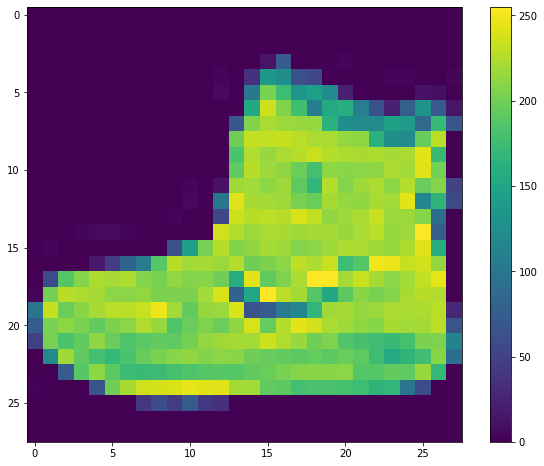

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

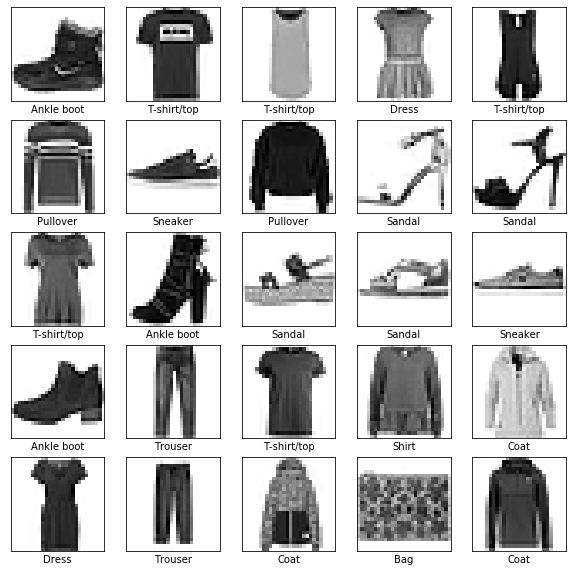

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4997 - accuracy: 0.8240
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3757 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3371 - accuracy: 0.8767
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3149 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2953 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2819 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2701 - accuracy: 0.8992
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2588 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2517 - accuracy: 0.9062
Epoch 10/10
60

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.2239 - accuracy: 0.8806


In [18]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8806


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([1.9953461e-06, 1.4958873e-11, 1.3177576e-09, 1.2240893e-13,
       7.2894757e-10, 1.3758169e-03, 1.2034680e-07, 5.5939290e-03,
       1.8204235e-08, 9.9302810e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
              color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

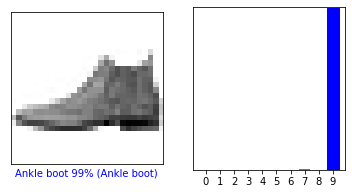

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

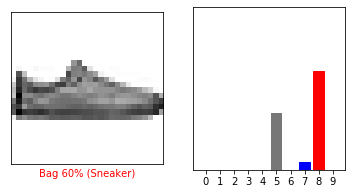

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

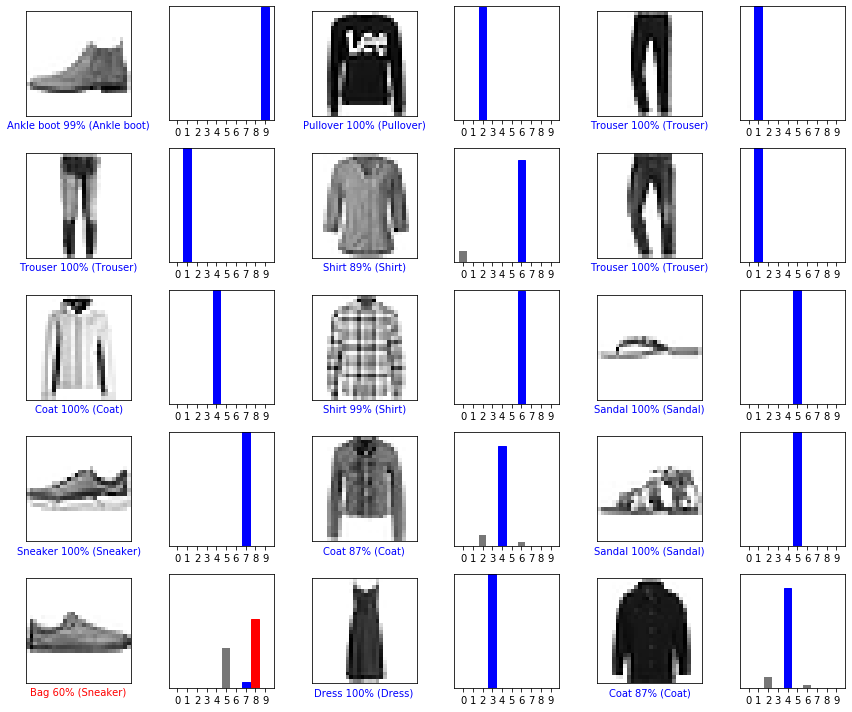

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5396730e-05 9.2978188e-15 9.9715996e-01 3.1382763e-13 2.5278020e-03
  2.1435355e-15 2.9679603e-04 2.5788572e-17 7.4349979e-12 3.8184495e-13]]


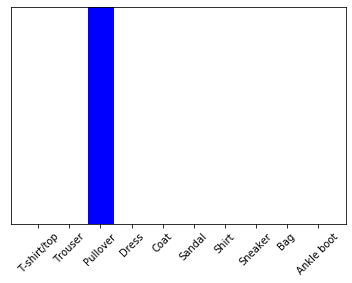

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2